In [1]:
import subprocess
import csv
import numpy as np
# from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cmd = ['./cg', 'bcsstk11.mtx', 'foo']
samples = np.logspace(0,5,10,dtype=int)
output_file = 'output.csv'
with open(output_file, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Iterations_C', 'ratio_C', 'Iterations_D', 'ratio_D'])
    for sample in (samples):
        cmd[2] = f'{sample}'
        res = subprocess.run(cmd, stdout=subprocess.PIPE, text=True)
        output = res.stdout.strip()
        x, y , z, w = map(float, output.split(','))
        writer.writerow([x,y,z,w])


In [2]:
df1 = pd.read_csv('output.csv')
df2 = pd.read_csv('output_task1.csv')

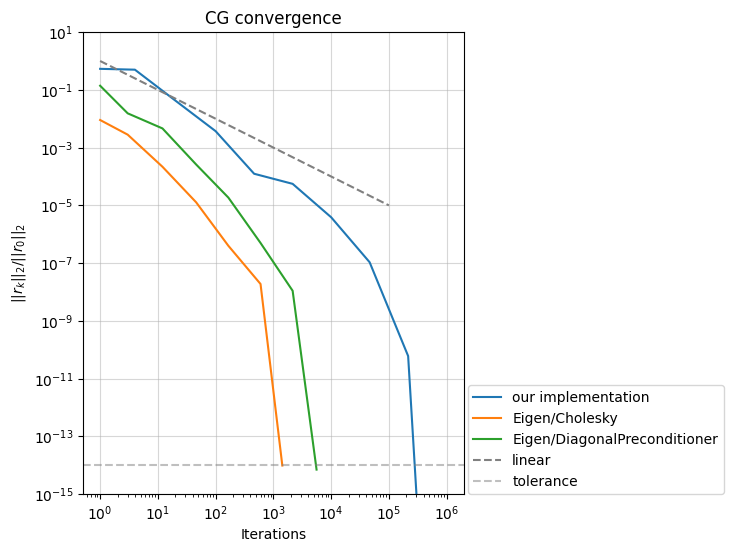

In [5]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
x = np.logspace(0,5,10,dtype=int)
ax.plot(df2['Iterations'].values, df2['ratio'].values, label="our implementation")
ax.plot(df1['Iterations_C'].values, df1['ratio_C'].values, label="Eigen/Cholesky")
ax.plot(df1['Iterations_D'].values, df1['ratio_D'].values, label="Eigen/DiagonalPreconditioner")
ax.plot(x, 1/x, label = 'linear', c='grey', linestyle = '--')
ax.axhline(1e-14, label ='tolerance', c='grey',linestyle = '--', alpha = 0.5 )

ax.set(yscale='log', xscale='log', ylim=[1e-15,10] ,ylabel = r"$||r_k||_2 / ||r_0||_2$", xlabel = 'Iterations', title='CG convergence'
       ,aspect=0.5)
ax.legend(loc = (1.01,0.0))
ax.grid(alpha = 0.5)

In [6]:
fig.savefig("results.png", dpi=400)